In [ ]:
#Currently have 3 json files that contain the locations of the points of interest
#The idea is to extract these images of the boxes, train a cnn on them
#Iterate the cnn on full images with these


In [ ]:
import json
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
current_files = os.listdir('/content/drive/MyDrive')

In [ ]:
#Need a list:
#Contains Image Name -> Relative Image ID -> The Relative Boxes
#Or make 3 separate lists

In [ ]:
with open('/content/drive/MyDrive/APS360ProjectData/train_box_locations.json', 'r') as info_on:
  iterator_for = json.load(info_on)

In [ ]:
global_id = {}

In [ ]:
for image in iterator_for['images']:
  global_id[image['file_name']] = image['id']
  #global_id.append({'file_name': image['file_name'], 'id': image['id']})

In [ ]:
print(global_id['levle2_136_jpg.rf.fcbb097ebfaa42bb65a15f1824392f6f.jpg'])

4


In [ ]:
print(global_id)

[{'file_name': 'levle1_76_jpg.rf.fcbc636ed312f7344f29ad7b9786412c.jpg', 'id': 0}, {'file_name': 'levle1_500_jpg.rf.ff22b94dfee5d3703f2aedd89352088e.jpg', 'id': 1}, {'file_name': 'levle1_457_jpg.rf.ff2cd8be9ff285684197c4c8c6e9b067.jpg', 'id': 2}, {'file_name': 'levle0_457_jpg.rf.fe12ecf15a40f2094356dee61f1a1993.jpg', 'id': 3}, {'file_name': 'levle2_136_jpg.rf.fcbb097ebfaa42bb65a15f1824392f6f.jpg', 'id': 4}, {'file_name': 'levle0_451_jpg.rf.fc5e925a819f49dc2645fc7a921f546d.jpg', 'id': 5}, {'file_name': 'levle1_42_jpg.rf.f9e77d687bf35a0a73fc58c4cfb22d1f.jpg', 'id': 6}, {'file_name': 'levle1_153_jpg.rf.ff14cae7957c04b83c0e0b1cc4e20ff5.jpg', 'id': 7}, {'file_name': 'levle1_422_jpg.rf.f9923ff524161852da898534d6f1d269.jpg', 'id': 8}, {'file_name': 'levle1_198_jpg.rf.fa7a9b2e19cd7d815080f0f434eadc72.jpg', 'id': 9}, {'file_name': 'levle1_4_jpg.rf.ff8d27de2968d7b156c12a967f02fbc5.jpg', 'id': 10}, {'file_name': 'levle0_217_jpg.rf.fda08efa772c25b2312aa9af49b3b14f.jpg', 'id': 11}, {'file_name': 'le

In [ ]:
info_with_id = {}

In [ ]:
for annotation in iterator_for['annotations']:
  image_id = annotation['image_id']
  current_info = {'id': annotation['id'], 'bbox': annotation['bbox']}

  if image_id in info_with_id:
    info_with_id[image_id].append(current_info)
  else:
    info_with_id[image_id] = [current_info]

In [ ]:
for testing in info_with_id[0]:
  print("Current ID", testing['id'], "Box Info", testing['bbox'])

Current ID 0 Box Info [3397, 428, 108, 175]
Current ID 1 Box Info [3272, 910, 191, 133]
Current ID 2 Box Info [3264, 1376, 183, 241]
Current ID 3 Box Info [3114, 1567, 191, 291]
Current ID 4 Box Info [2507, 1517, 200, 216]
Current ID 5 Box Info [2361, 3109, 140, 116]


In [ ]:
#Format: x, y, width, height

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [ ]:
current_image_path = '/content/drive/MyDrive/APS360ProjectData/train/levle2_136_jpg.rf.fcbb097ebfaa42bb65a15f1824392f6f.jpg'

In [ ]:
#Get the ID of the image:
id_of_image = global_id['levle2_136_jpg.rf.fcbb097ebfaa42bb65a15f1824392f6f.jpg']

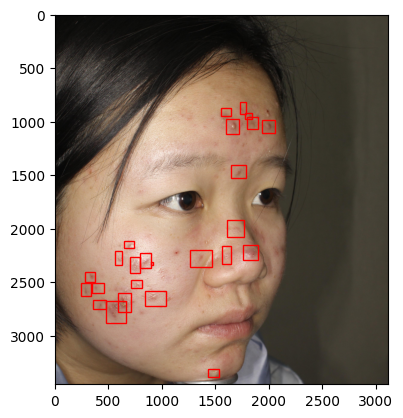

In [ ]:
#Trying to plot these boxes on the given image
current_image = Image.open(current_image_path)
figure, axis = plt.subplots(1)

axis.imshow(current_image)

for asd in info_with_id[id_of_image]:
  bbox = asd['bbox']
  x, y, w, h = bbox
  rectangle_box = patches.Rectangle((x,y,), w, h, linewidth=1, edgecolor='r', facecolor='none')
  axis.add_patch(rectangle_box)

plt.show()

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
import random

In [ ]:
class AcneIdentification(nn.Module):
    def __init__(self):
        super(AcneIdentification, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5, 1, 0) #124 - 5 + 1 = 120
        self.pool = nn.MaxPool2d(2, 2) #60
        self.conv2 = nn.Conv2d(32, 64, 5, 1, 0) #60 -4 = 56
        self.fc1 = nn.Linear(64*28*28, 512) #56/2 = 28
        self.fc2 = nn.Linear(512, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
current_files = os.listdir('/content/drive/MyDrive/APS360ProjectData/test')

In [ ]:
global_id_for_test = {}
info_with_id_for_test = {}

In [ ]:
#Filling up the dictionaries for the global id and info on the boxes
with open('/content/drive/MyDrive/APS360ProjectData/test_box_locations.json', 'r') as info_on_test:
  iterator_for_test = json.load(info_on_test)

for image in iterator_for_test['images']:
  global_id_for_test[image['file_name']] = image['id']

for annotation in iterator_for_test['annotations']:
  image_id = annotation['image_id']
  current_info = {'id': annotation['id'], 'bbox': annotation['bbox']}

  if image_id in info_with_id_for_test:
    info_with_id_for_test[image_id].append(current_info)
  else:
    info_with_id_for_test[image_id] = [current_info]

Don't run this again, will pollute the dataset

In [ ]:
max_height = 3456
max_width = 3112
counter = 0
current_files = os.listdir('/content/drive/MyDrive/APS360ProjectData/train')
for name in current_files:
  current_image = Image.open('/content/drive/MyDrive/APS360ProjectData/train/' + name)

  for key in info_with_id_for_test[global_id_for_test[name]]:
    x,y, width, height = key['bbox']
    current_patch = current_image.crop((x, y, x+width, y+height))
    output_path = os.path.join('/content/drive/MyDrive/APS360ProjectData/rcnn_train/acne/' + f'{global_id_for_test[name]}_{key["id"]}.jpg')
    current_patch.save(output_path)

    x_rand = random.randint(500, max_width/2 - 100)
    y_rand = random.randint(500, max_height/2 - 100)
    #for noise
    random_patch = current_image.crop((x_rand, y_rand, x_rand + 100, y_rand + 100))
    output_path_for_rand = os.path.join('/content/drive/MyDrive/APS360ProjectData/rcnn_train/non_acne/' + f'{global_id_for_test[name]}_{key["id"]}_noise.jpg')
    random_patch.save(output_path_for_rand)
  counter+=1
  print(counter)

In [ ]:
#path_to_model = "final_one"
#torch.save(model.state_dict(),path_to_model );

In [ ]:
target_size = (124, 124)



transform_app = transforms.Compose([transforms.Resize(target_size), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]);

rcn_data_set = datasets.ImageFolder('/content/drive/MyDrive/APS360ProjectData/rcnn_train', transform_app)

In [ ]:
print(len(rcn_data_set))
print(rcn_data_set.classes)

positive_id = rcn_data_set.classes.index('acne')
print(positive_id)
rcn_data_set.classes = ['acne', 'non_acne'] if positive_id == 0 else ['non_acne', 'acne']
print(rcn_data_set.classes)

2645
['acne', 'non_acne']
0
['acne', 'non_acne']


In [ ]:
from torchvision import transforms

In [ ]:
print(rcn_data_set[1323])
image_tensor, label_tensor = rcn_data_set[244]
to_pils = transforms.ToPILImage()
final_image = to_pils(image_tensor)
#plt.imshow(final_image)
#plt.show()

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 1)


In [ ]:
def get_accuracy(model, data):

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=50):

        output = model(imgs)

        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, data, batch_size=50, num_epochs=10):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    iters, losses, train_acc, val_acc = [], [], [], []

    n = 0
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            one_hot = torch.zeros(labels.size(0),2)
            one_hot[torch.arange(labels.size(0)), labels] = 1
            out = model(imgs)

            loss = criterion(out, one_hot)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            #iters.append(n)
            #losses.append(float(loss)/batch_size)
            #train_acc.append(get_accuracy(model, data))
            #val_acc.append(get_accuracy(model))
            n += 1
        print("Epoch Number Done:", epoch)
        path_to_model = "final_one"
        torch.save(model.state_dict(),path_to_model );
    # plotting
    #plt.title("Evaluating Training Loss")
    #plt.plot(iters, losses, label="Train")
    #plt.xlabel("Iterations")
    #plt.ylabel("Loss")
    #plt.show()

    #plt.title("Evaluating Accuracy")
    #plt.plot(iters, train_acc, label="Train")
    #plt.plot(iters, val_acc, label="Validation")
    #plt.xlabel("Iterations")
    #plt.ylabel("Training Accuracy")
    #plt.legend(loc='best')
    #plt.show()

    #print("Final Training Accuracy: {}".format(train_acc[-1]))
    #print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
first_model = AcneIdentification()

In [ ]:
train(first_model, rcn_data_set)

Epoch Number Done: 0
Epoch Number Done: 1
Epoch Number Done: 2
Epoch Number Done: 3
Epoch Number Done: 4
Epoch Number Done: 5
Epoch Number Done: 6
Epoch Number Done: 7
Epoch Number Done: 8
Epoch Number Done: 9


In [ ]:
testing_one_image = Image.open('/content/drive/MyDrive/APS360ProjectData/test/levle0_183_jpg.rf.1fe946b518ea2fa801da149c11b4d9cd.jpg')

In [ ]:
print(testing_one_image.size)
dimensions_ = testing_one_image.size
width_ = dimensions_[0]
height_ = dimensions_[1]

(3112, 3456)


In [ ]:
#x,y, width, height = key['bbox']
   # current_patch = current_image.crop((x, y, x+width, y+height))
   #124 x 124

In [ ]:
target_size = (124, 124)
transform_app = transforms.Compose([transforms.Resize(target_size), transforms.ToTensor()]);
asdasd = transforms.ToTensor()
image_to_test = transform_app(testing_one_image)

In [ ]:
import cv2

In [ ]:
image = cv2.imread('/content/drive/MyDrive/APS360ProjectData/rcnn_train/acne/3_51.jpg')

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

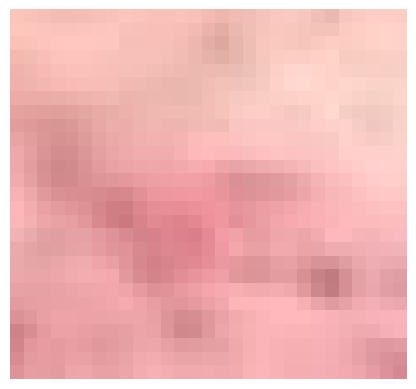

In [ ]:
plt.imshow(image_rgb)
plt.axis('off')  # Disable axis
plt.show()

In [ ]:
resized_image = cv2.resize(image, (124, 124), interpolation=cv2.INTER_LANCZOS4)

In [ ]:
image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

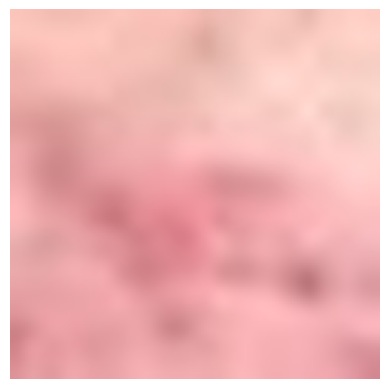

In [ ]:
plt.imshow(image_rgb)
plt.axis('off')  # Disable axis
plt.show()

In [ ]:
testing_one_image = Image.open('/content/drive/MyDrive/APS360ProjectData/rcnn_train/acne/2_45jpg')

NameError: name 'Image' is not defined

In [ ]:
softmax_output = F.softmax(first_model(image_to_test), dim=1)
predicted_class = torch.argmax(softmax_output, dim=1).item()

print(predicted_class)
print(softmax_output)
print(softmax_output[0][1])

1
tensor([[4.0550e-10, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)
tensor(1., grad_fn=<SelectBackward0>)


In [ ]:
patch_size = 124
step_size = 22 #changeable

In [ ]:
figure, axis = plt.subplots(1)
axis.imshow(testing_one_image)

for y in range(0, 3456 - patch_size + 1, 124):
  for x in range(0, 3112 - patch_size + 1, 124):
    current_patch_ = testing_one_image.crop((x, y, x + patch_size, y + patch_size))
    testing_this_p = asdasd(current_patch_)
    softmax_output_ = F.softmax(first_model(testing_this_p), dim=1)
    print(softmax_output)
    predicted_class_ = torch.argmax(softmax_output_, dim=1).item()
    if(predicted_class_ == 1):
      rectangle_box = patches.Rectangle((x,y,), 124, 124, linewidth=1, edgecolor='r', facecolor='none')
      axis.add_patch(rectangle_box)

plt.show()


In [ ]:
class AcneIdentificationSecond(nn.Module):
    def __init__(self):
        super(AcneIdentificationSecond, self).__init__()
        self.name = "Second_One"
        self.conv1 = nn.Conv2d(3, 32, 5, 1, 0) #124 - 5 + 1 = 120
        self.pool = nn.MaxPool2d(2, 2) #60
        self.conv2 = nn.Conv2d(32, 64, 5, 1, 0) #60 -4 = 56
        self.fc1 = nn.Linear(64*28*28, 512) #56/2 = 28
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1)
        return x

In [ ]:
def get_relevant_indices(dataset, classes, target_classes):

    indices = []
    for i in range(len(dataset)):
        label_index = dataset[i][1]
        label_class = classes[label_index]
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    classes = ('acne', 'non_acne')
    target_size = (124, 124)

    transform_app = transforms.Compose([transforms.Resize(target_size),transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]);

    trainset = datasets.ImageFolder('/content/drive/MyDrive/APS360ProjectData/rcnn_train_INTER_LANCZOS4', transform_app)

    relevant_indices = get_relevant_indices(trainset, classes, target_classes)

    np.random.seed(1000)
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8)

    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    return train_loader, val_loader, classes

def get_model_name(name, batch_size, learning_rate, epoch):

    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):

    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

def plot_training_curve(path):

    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [ ]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    target_classes = ["acne", "non_acne"]
    torch.manual_seed(1000)
    train_loader, val_loader, classes = get_data_loader(
            target_classes, batch_size)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    start_time = time.time()
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            labels = normalize_label(labels)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

In [ ]:
final_model_2 = AcneIdentificationSecond()
train_net(final_model_2, batch_size=512, learning_rate=0.05, num_epochs=10)

Epoch 1: Train err: 0.41824196597353497, Train loss: 0.5561039030551911 |Validation err: 0.18147448015122875, Validation loss: 0.35809941589832306
Epoch 2: Train err: 0.18147448015122875, Train loss: 0.4181481897830963 |Validation err: 0.17580340264650285, Validation loss: 0.44448503851890564
Epoch 3: Train err: 0.1833648393194707, Train loss: 0.41313146352767943 |Validation err: 0.1776937618147448, Validation loss: 0.46565522253513336
Epoch 4: Train err: 0.17958412098298676, Train loss: 0.42005482912063596 |Validation err: 0.18147448015122875, Validation loss: 0.3719891756772995
Epoch 5: Train err: 0.1715500945179584, Train loss: 0.38839133977890017 |Validation err: 0.17580340264650285, Validation loss: 0.36430418491363525
Epoch 6: Train err: 0.17438563327032136, Train loss: 0.3723326027393341 |Validation err: 0.18147448015122875, Validation loss: 0.42346882820129395
Epoch 7: Train err: 0.1724952741020794, Train loss: 0.3210979014635086 |Validation err: 0.17580340264650285, Validation

In [ ]:
#image_to_test
print(final_model_2(image_to_test)[0].item())

-0.42442646622657776


In [ ]:
probabilities = torch.sigmoid(final_model_2(image_to_test))
print(probabilities[0].item())

0.39545804262161255


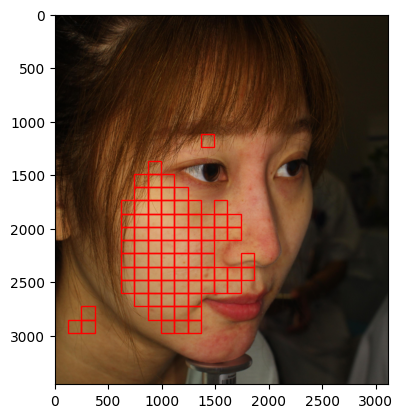

In [ ]:
figure, axis = plt.subplots(1)
axis.imshow(testing_one_image)

for y in range(0, 3456 - patch_size + 1, 124):
  for x in range(0, 3112 - patch_size + 1, 124):
    current_patch_ = testing_one_image.crop((x, y, x + patch_size, y + patch_size))
    testing_this_p = asdasd(current_patch_)
    probability = torch.sigmoid(final_model_2(testing_this_p))
    if(probability[0].item() > 0.488):
      rectangle_box = patches.Rectangle((x,y,), 124, 124, linewidth=1, edgecolor='r', facecolor='none')
      axis.add_patch(rectangle_box)

plt.show()

From this point it is clear that the accuracy of the model is very limited. Hence we will try to improve the quality of the images supplied to the model for training using resized_image = cv2.resize(image, (124, 124), interpolation=cv2.INTER_LANCZOS4)

In [ ]:
#testing_one_image = Image.open('/content/drive/MyDrive/APS360ProjectData/rcnn_train/acne/2_45jpg')

In [ ]:
current_files = os.listdir('/content/drive/MyDrive/APS360ProjectData/rcnn_train/acne')

for name in current_files:
  currena_im = cv2.imread('/content/drive/MyDrive/APS360ProjectData/rcnn_train/acne/' + name)
  if currena_im is None:
    break;
  resized_image = cv2.resize(currena_im, (124, 124), interpolation=cv2.INTER_LANCZOS4)
  output_dir = '/content/drive/MyDrive/APS360ProjectData/rcnn_train_INTER_LANCZOS4/acne/'
  cv2.imwrite(output_dir+name, resized_image)

In [ ]:
model_trained_on_inter_lancoz = AcneIdentificationSecond()
train_net(model_trained_on_inter_lancoz, batch_size=512, learning_rate=0.05, num_epochs=10)

Epoch 1: Train err: 0.44612476370510395, Train loss: 0.5647352278232575 |Validation err: 0.1833648393194707, Validation loss: 0.3626520335674286
Epoch 2: Train err: 0.17391304347826086, Train loss: 0.41366085410118103 |Validation err: 0.1833648393194707, Validation loss: 0.40631432831287384
Epoch 3: Train err: 0.17533081285444235, Train loss: 0.3888587713241577 |Validation err: 0.1776937618147448, Validation loss: 0.4088887870311737
Epoch 4: Train err: 0.17485822306238186, Train loss: 0.39884085655212403 |Validation err: 0.17580340264650285, Validation loss: 0.37442921102046967
Epoch 5: Train err: 0.17580340264650285, Train loss: 0.39221511483192445 |Validation err: 0.1776937618147448, Validation loss: 0.28451573848724365
Epoch 6: Train err: 0.17438563327032136, Train loss: 0.35404144525527953 |Validation err: 0.1947069943289225, Validation loss: 0.5667165666818619
Epoch 7: Train err: 0.17391304347826086, Train loss: 0.3285690784454346 |Validation err: 0.17580340264650285, Validation l

In [ ]:
testing_one_image = Image.open('/content/drive/MyDrive/APS360ProjectData/test/levle3_83_jpg.rf.ffb3718446b8538ee1f8d2d8ca1e24a8.jpg')

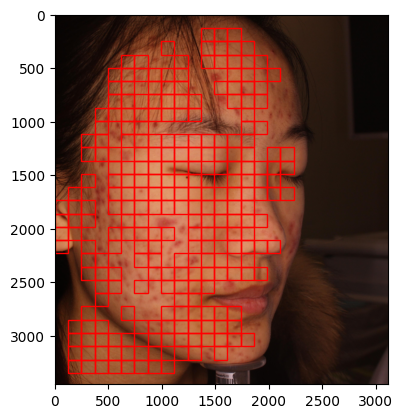

In [ ]:
figure, axis = plt.subplots(1)
axis.imshow(testing_one_image)
patch_size = 124
for y in range(0, 3456 - patch_size + 1, 124):
  for x in range(0, 3112 - patch_size + 1, 124):
    current_patch_ = testing_one_image.crop((x, y, x + patch_size, y + patch_size))
    testing_this_p = asdasd(current_patch_)
    #model_trained_on_inter_lancoz
    probability = torch.sigmoid(model_trained_on_inter_lancoz(testing_this_p))
    if(probability[0].item() > 0.39):
      rectangle_box = patches.Rectangle((x,y,), 124, 124, linewidth=1, edgecolor='r', facecolor='none')
      axis.add_patch(rectangle_box)

plt.show()